<a href="https://colab.research.google.com/github/Maxie503/CampusX-100Days-of-DL/blob/main/Day_49_Cat_Vs_Dog_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 54.7MB/s]
100% 812M/812M [00:09<00:00, 89.9MB/s]


In [6]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content/dogcat')
zip_ref.close()

In [7]:
zip_ref = zipfile.ZipFile('/content/dogcat/test1.zip', 'r')
zip_ref.extractall('/content/dogcat/test')
zip_ref.close()
zip_ref = zipfile.ZipFile('/content/dogcat/train.zip', 'r')
zip_ref.extractall('/content/dogcat/train')
zip_ref.close()


In [8]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [33]:
#  generators

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogcat/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)


valid_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogcat/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [10]:
# Normalization of data


def normalization(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(normalization)
valid_ds = valid_ds.map(normalization)


In [11]:
# CNN model:

m1 = Sequential()
m1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2),strides=2))


m1.add(Flatten())

m1.add(Dense(128, activation='relu'))
m1.add(Dense(64, activation='relu'))
m1.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
hist = m1.fit(train_ds, epochs=10, validation_data=valid_ds,batch_size=32)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9908 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 94ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━

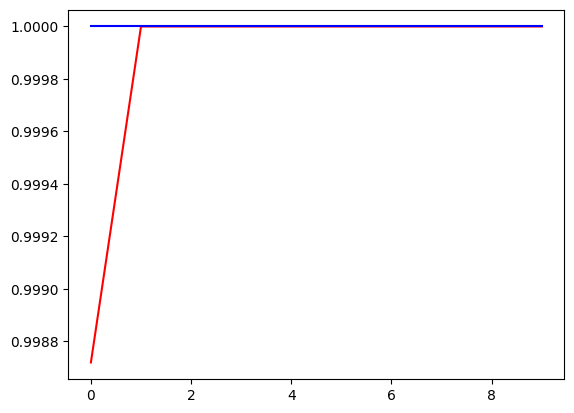

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label="accuracy",color='r')
plt.plot(hist.history['val_accuracy'], label="val_accuracy",color='b')

plt.show()

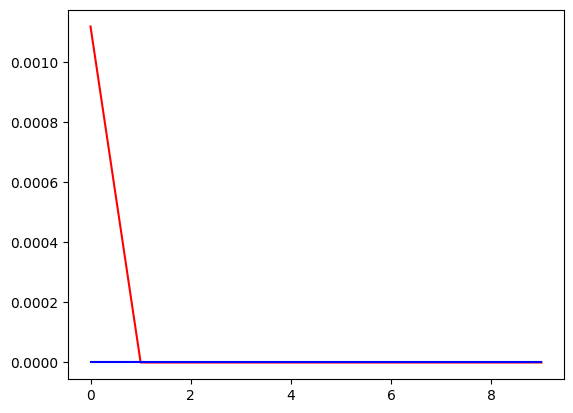

In [18]:

plt.plot(hist.history['loss'], label="loss",c='r')
plt.plot(hist.history['val_loss'], label="val_loss",c='b')

plt.show()

In [20]:
from keras.layers import BatchNormalization, Dropout

# Batch Norm + Dropout

In [21]:


m2 = Sequential()
m2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(pool_size=(2, 2),strides=2))


m2.add(Flatten())

m2.add(Dense(128, activation='relu'))
m2.add(Dropout(0.1))
m2.add(Dense(64, activation='relu'))
m2.add(Dense(1, activation='sigmoid'))


In [22]:
  m2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
hist2 = m2.fit(train_ds, epochs=10, validation_data=valid_ds,batch_size=32)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9933 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 2.5066e-16
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 1.0000 - loss: 1.0420e-15 - val_accuracy: 1.0000 - val_loss: 1.3756e-14
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 1.0000 - loss: 1.2091e-15 - val_accuracy: 1.0000 - val_loss: 1.2514e-14
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 8.8754e-14 - val_accuracy: 1.0000 - val_loss: 1.2071e-14
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 1.0945e-09 - val_accuracy: 1.0000 - val_loss: 5.4925e-15
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 1.0000 - loss: 7.6481e-13 - val_accuracy: 1.0000 - val_loss: 5.9993e-15
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 6.5654e-14 - val_accuracy: 1.0000 - val_loss: 5.2765e-15
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━

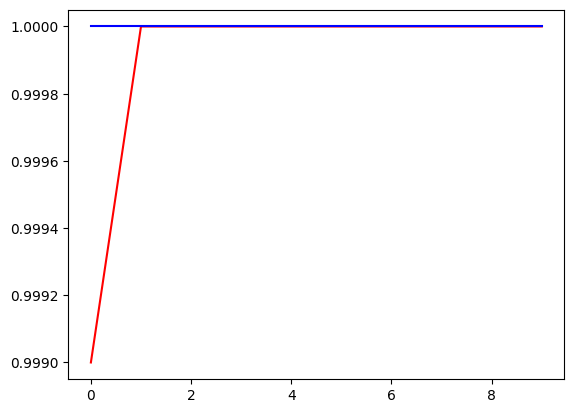

In [25]:
plt.plot(hist2.history['accuracy'], label="accuracy",color='r')
plt.plot(hist2.history['val_accuracy'], label="val_accuracy",color='b')

plt.show()

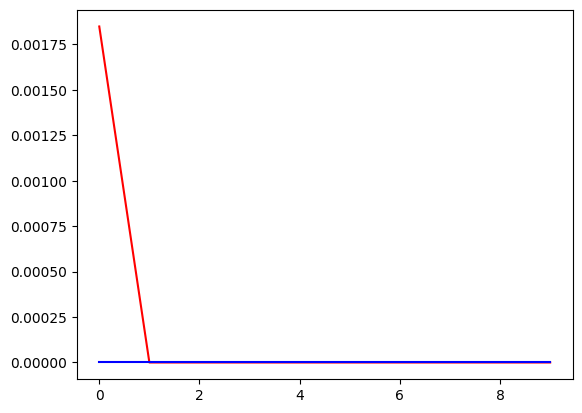

In [26]:
plt.plot(hist2.history['loss'], label="loss",c='r')
plt.plot(hist2.history['val_loss'], label="val_loss",c='b')

plt.show()